In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [2]:
df_orders = pd.read_csv('data_orders.csv')

In [3]:
df_offers = pd.read_csv('data_offers.csv')

In [4]:
df_orders.head()

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
0,2020-07-22 18:08:07,3000583041974,4,1,198.0
1,2020-07-22 20:57:32,3000583116437,4,0,128.0
2,2020-07-22 12:07:50,3000582891479,4,1,46.0
3,2020-07-22 13:50:20,3000582941169,4,1,62.0
4,2020-07-22 21:24:45,3000583140877,9,0,NaN


In [5]:
df_offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [6]:
df_orders.info()
#в столбце cancellations_time_in_second присутствуют пустые значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   order_gk                       10716 non-null  int64  
 2   order_status_key               10716 non-null  int64  
 3   is_courier_assigned_key        10716 non-null  int64  
 4   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 418.7+ KB


In [7]:
df_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


In [8]:
df_orders.duplicated().sum()
#дубликаты отсутсвуют в обоих датафреймах

0

In [9]:
df_offers.duplicated().sum()

0

In [10]:
df_orders.dtypes

order_datetime                    object
order_gk                           int64
order_status_key                   int64
is_courier_assigned_key            int64
cancellations_time_in_seconds    float64
dtype: object

In [11]:
df_orders['order_datetime'] = pd.to_datetime(df_orders['order_datetime'])

Посмотрим, где именно присутствуют пустые значения

In [12]:
null_val = df_orders.query('cancellations_time_in_seconds != cancellations_time_in_seconds')

In [13]:
null_val.head()

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds
4,2020-07-22 21:24:45,3000583140877,9,0,NaN
5,2020-07-22 21:21:23,3000583117054,9,0,NaN
6,2020-07-22 07:58:15,3000582791789,9,0,NaN
7,2020-07-22 07:53:46,3000582791562,9,0,NaN
8,2020-07-22 08:53:01,3000582817606,9,0,NaN


In [14]:
null_val['order_status_key'].value_counts()
#нулевые значение только в строках со статусом 9 

9    3409
Name: order_status_key, dtype: int64

In [15]:
null_val['is_courier_assigned_key'].value_counts()

0    3406
1       3
Name: is_courier_assigned_key, dtype: int64

In [16]:
df_orders['order_status_key'].value_counts()
#видим, что все значения, со статусом 9 имеют нулевые значения, возможно был сбой в системе

4    7307
9    3409
Name: order_status_key, dtype: int64

Посмотрим, сбой в системе произошел только в вычислении времени до отмены заказа, или так же в назначении курьера

In [17]:
df_orders.query('order_status_key == 9').is_courier_assigned_key.value_counts(normalize=True)
#доля заказов, для которых был назначен курьер, в отмененных системой, составляет меньше 1%
#скорее всего сбой в системе связан и с этой аномалией 

0    0.99912
1    0.00088
Name: is_courier_assigned_key, dtype: float64

Объединим датафрейм с нулевыми значениями с датафреймом df_offers

In [18]:
null_val.merge(df_offers, how='left')
#почему-то таблица имеет больше строк, чем датафрейм с нулевыми значениями

,order_datetime,order_gk,order_status_key,is_courier_assigned_key,cancellations_time_in_seconds,offer_id
0,2020-07-22 21:24:45,3000583140877,9,0,NaN,NaN
1,2020-07-22 21:21:23,3000583117054,9,0,NaN,3.000510e+11
2,2020-07-22 21:21:23,3000583117054,9,0,NaN,3.000510e+11
3,2020-07-22 21:21:23,3000583117054,9,0,NaN,3.000510e+11
4,2020-07-22 21:21:23,3000583117054,9,0,NaN,3.000510e+11
...,...,...,...,...,...,...
10972,2020-07-22 08:04:58,3000554721763,9,0,NaN,NaN
10973,2020-07-22 08:08:36,3000554721897,9,0,NaN,3.000507e+11
10974,2020-07-22 08:08:36,3000554721897,9,0,NaN,3.000507e+11
10975,2020-07-22 23:33:46,3000555121226,9,0,NaN,NaN


In [19]:
df_offers.order_gk.value_counts()
#order_gk показывает номер заказа, а order_id - ID оффера, который был предложен курьеру по данному заказу
#на один и тот же заказ могут быть назначены несколько ID оффера
#я не знаю, какую информацию точно несет в себе столбец order_id, но я думаю, что он должен быть только один у каждого заказа
#скорее всего здесь тоже есть какая-то ошибка

3000622541299    9
3000591156831    9
3000592296546    9
3000623018231    9
3000582817158    9
                ..
3000599186936    1
3000594272454    1
3000628607809    1
3000589832090    1
3000557510943    1
Name: order_gk, Length: 97967, dtype: int64

Т.к. в объединенной таблице можно было заметить, что на некоторые заказы были назначены ID офферов курьерам, а данные говорят о том, что курьеры не были назначены, то скорее всего преположение о том, что система не зафиксировала факт назначения курьера правильное

В таком случае посмотрим, для всех ли заказов, на которые был назначен курьер есть ID офферов

In [20]:
df_orders.query('is_courier_assigned_key == 1').merge(df_offers, how='left').isna().sum()
#есть 474 заказа на которые не был назначени оффер курьерам

order_datetime                     0
order_gk                           0
order_status_key                   0
is_courier_assigned_key            0
cancellations_time_in_seconds      5
offer_id                         474
dtype: int64

In [21]:
df_orders.query('is_courier_assigned_key == 1') \
  .merge(df_offers, how='left') \
  .query('offer_id != offer_id') \
  .order_status_key \
  .value_counts(normalize=True)
#почти все заказы отменены покупателями

4    0.99789
9    0.00211
Name: order_status_key, dtype: float64

Построим гистограмму распределения времени до отмены

C:\Users\xazzz\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cancellations_time_in_seconds'>

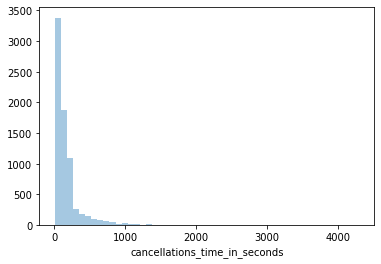

In [22]:
sns.distplot(df_orders['cancellations_time_in_seconds'], kde = False)
#видим заметные выбросы 

Посмотрим на это распределение подобронее на ящике с усами

<AxesSubplot:title={'center':'cancellations_time_in_seconds'}, xlabel='[order_status_key, is_courier_assigned_key]'>

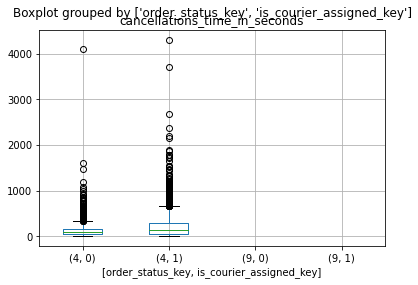

In [23]:
df_orders.boxplot(column='cancellations_time_in_seconds', by=['order_status_key', 'is_courier_assigned_key'])
#видим, что для заказов, отмененных системой графики не построились, т.к. данных по времени для них нет
#заметные выбросы присутствуют в обоих случаях для заказов, отмененных покупателями

C:\Users\xazzz\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cancellations_time_in_seconds'>

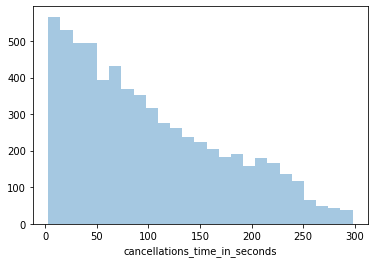

In [24]:
sns.distplot(df_orders.query('cancellations_time_in_seconds<300')['cancellations_time_in_seconds'], kde = False)
#гистограмма без выбросов

Среднее время отмены заказа без выбросов

In [25]:
df_orders.query('cancellations_time_in_seconds<300')['cancellations_time_in_seconds'].mean()

100.4320987654321

Посмотрим на среднее времени до отмены (cancellations_time_in_seconds) с назначенным курьером и без, по часам

In [26]:
df_orders['hour'] = df_orders.order_datetime.dt.hour

In [27]:
hour = df_orders.groupby(['hour', 'order_status_key', 'is_courier_assigned_key'], as_index=False) \
          .agg({'order_gk': 'count'}) \
          .sort_values('hour')
          #.pivot(index=['order_status_key', 'is_courier_assigned_key'], columns='hour', values='order_gk')

In [28]:
hour

,hour,order_status_key,is_courier_assigned_key,order_gk
0,0,4,0,298
1,0,4,1,120
2,0,9,0,263
3,0,9,1,2
4,1,4,0,219
...,...,...,...,...
69,22,4,1,149
70,22,9,0,241
72,23,4,1,156
71,23,4,0,378


In [29]:
mean_hour = df_orders.groupby(['is_courier_assigned_key', 'hour'], as_index=False).agg({'cancellations_time_in_seconds': 'mean'})

In [30]:
mean_hour

,is_courier_assigned_key,hour,cancellations_time_in_seconds
0,0,0,111.557047
1,0,1,98.132420
2,0,2,106.438819
3,0,3,104.361607
4,0,4,90.000000
5,0,5,121.800000
6,0,6,124.955224
7,0,7,112.628049
8,0,8,120.702179
9,0,9,120.000000


<AxesSubplot:xlabel='hour', ylabel='cancellations_time_in_seconds'>

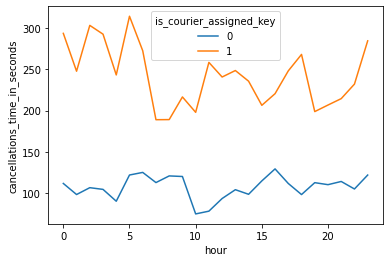

In [31]:
sns.lineplot(data=mean_hour, x='hour', y='cancellations_time_in_seconds', hue='is_courier_assigned_key')

Посмотрим на количество отмененных заказов в час

In [32]:
df_1 = df_orders.sort_values('order_datetime').set_index('order_datetime')

<AxesSubplot:xlabel='order_datetime'>

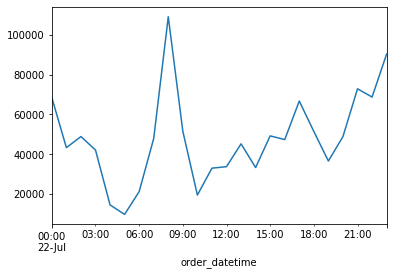

In [33]:
df_1.resample(rule='H').cancellations_time_in_seconds.sum().plot()
#самое большое кол-во отмененных заказов приходится на 8 утра

Просмотрев на данные можно сделать вывод, что отмена заказов системой имеет проблемы. Необходимо разобраться по какой причине возник сбой и как его исправить. Так же было обнаружено, что в таблице df_offers у одного номера заказа могут присутстовать несколько ID оффера, который был предложен курьеру по данному заказу. Необходимо уточнить этот вопрос, т.к. у меня складывается впечатление, что здесь тоже присутствует ошибка. Далее стало заметно, что часть информации либо отсутсвует, либо произошел сбой в системе. Не для всех заказов, на которые был назначен курьер присутствуют данные ID оффера курьерам. Необходимо посмотреть более детально, возможно есть какие-то баги при назначении оффера.

Пиковое количество отмены заказов приходится на 8 утра, возможно это связано с тем, что люди делают вечером за день до этого импульсивные покупки и на утро жалеют об этом и решают отменить заказ. Можно попробовать скорректировать время работы имея данную информацию, может начать обрабатывать заказы в 9 утра, как вариант. 

Среднее время отмены заказа с курером больше, чем без него. Есть предположение, что это связано с тем, что покупатели не могу договориться о времени доставки товара и им проще отказаться от него совсем. Необходимо внимательнее рассмотреть этот момент и выяснить почему именно так происходит.




